In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

C:\Users\hmitt\AppData\Local\Temp\ipykernel_31264\2511512613.py:10: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
C:\Users\hmitt\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
train = pd.read_csv("C:\\Users\\hmitt\\Python notebooks\\train_FE.csv")

In [3]:
train

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,...,pickup_year,pickup_day_of_week,hav_distance,euc_distance,precipitation,snow_depth,snowfall,max_temp,min_temp,avg_wind
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,...,2009,Monday,0.640487,0.651073,127,0,0,222,139,14
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,...,2010,Tuesday,5.250670,5.499001,0,0,0,-11,-67,44
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,...,2011,Thursday,0.863411,0.943509,18,0,0,283,194,22
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,...,2012,Saturday,1.739386,1.748493,56,0,0,217,122,22
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,...,2010,Tuesday,1.242218,1.343397,0,0,0,161,67,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955579,1955579,2014-11-17 13:51:02.0000002,4.0,2014-11-17 13:51:02,-73.950787,40.770836,-73.951043,40.774543,1,13,...,2014,Monday,0.256479,0.256392,391,0,0,111,44,17
1955580,1955580,2013-02-25 17:51:28.0000004,7.0,2013-02-25 17:51:28,-73.983035,40.748276,-73.974725,40.741978,1,17,...,2013,Monday,0.615289,0.719458,0,0,0,72,0,21
1955581,1955581,2013-07-12 22:03:41.0000006,10.5,2013-07-12 22:03:41,-74.003482,40.743577,-73.976758,40.765265,1,22,...,2013,Friday,2.049851,2.374785,64,0,0,250,200,43
1955582,1955582,2009-01-17 09:35:37.0000002,10.9,2009-01-17 09:35:37,-73.971819,40.797243,-73.985921,40.752459,3,9,...,2009,Saturday,3.181034,3.239675,0,0,0,-56,-144,25


In [4]:
train = train.drop('Unnamed: 0', axis=1)
train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,...,pickup_year,pickup_day_of_week,hav_distance,euc_distance,precipitation,snow_depth,snowfall,max_temp,min_temp,avg_wind
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,15,...,2009,Monday,0.640487,0.651073,127,0,0,222,139,14
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5,...,2010,Tuesday,5.250670,5.499001,0,0,0,-11,-67,44
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,...,2011,Thursday,0.863411,0.943509,18,0,0,283,194,22
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,21,...,2012,Saturday,1.739386,1.748493,56,0,0,217,122,22
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,...,2010,Tuesday,1.242218,1.343397,0,0,0,161,67,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955579,2014-11-17 13:51:02.0000002,4.0,2014-11-17 13:51:02,-73.950787,40.770836,-73.951043,40.774543,1,13,17,...,2014,Monday,0.256479,0.256392,391,0,0,111,44,17
1955580,2013-02-25 17:51:28.0000004,7.0,2013-02-25 17:51:28,-73.983035,40.748276,-73.974725,40.741978,1,17,25,...,2013,Monday,0.615289,0.719458,0,0,0,72,0,21
1955581,2013-07-12 22:03:41.0000006,10.5,2013-07-12 22:03:41,-74.003482,40.743577,-73.976758,40.765265,1,22,12,...,2013,Friday,2.049851,2.374785,64,0,0,250,200,43
1955582,2009-01-17 09:35:37.0000002,10.9,2009-01-17 09:35:37,-73.971819,40.797243,-73.985921,40.752459,3,9,17,...,2009,Saturday,3.181034,3.239675,0,0,0,-56,-144,25


In [6]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,pickup_month,pickup_year,hav_distance,euc_distance,precipitation,snow_depth,snowfall,max_temp,min_temp,avg_wind
count,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06,1.955584e+06
mean,1.128871e+01,-7.397554e+01,4.075082e+01,-7.397463e+01,4.075118e+01,1.684452e+00,1.350871e+01,1.570563e+01,6.269178e+00,2.011738e+03,2.053773e+00,2.336134e+00,3.505409e+01,1.651178e+01,2.418880e+00,1.677731e+02,8.856221e+01,2.553576e+01
std,9.480855e+00,3.440604e-02,2.688256e-02,3.389022e-02,3.075060e-02,1.306931e+00,6.513823e+00,8.682245e+00,3.438132e+00,1.863121e+00,2.205041e+00,2.627747e+00,9.851195e+01,6.452803e+01,1.868294e+01,1.019232e+02,9.258067e+01,1.126551e+01
min,0.000000e+00,-7.425882e+01,4.048254e+01,-7.425858e+01,4.047791e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.900000e+01,-1.660000e+02,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399160e+01,4.073552e+01,1.000000e+00,9.000000e+00,8.000000e+00,3.000000e+00,2.010000e+03,7.791952e-01,8.838913e-01,0.000000e+00,0.000000e+00,0.000000e+00,8.300000e+01,1.700000e+01,1.800000e+01
50%,8.500000e+00,-7.398211e+01,4.075333e+01,-7.398063e+01,4.075382e+01,1.000000e+00,1.400000e+01,1.600000e+01,6.000000e+00,2.012000e+03,1.336914e+00,1.503304e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.780000e+02,9.400000e+01,2.400000e+01
75%,1.250000e+01,-7.396839e+01,4.076748e+01,-7.396543e+01,4.076837e+01,2.000000e+00,1.900000e+01,2.300000e+01,9.000000e+00,2.013000e+03,2.429477e+00,2.668087e+00,1.300000e+01,0.000000e+00,0.000000e+00,2.560000e+02,1.670000e+02,3.200000e+01
max,5.000000e+02,-7.370044e+01,4.091748e+01,-7.370039e+01,4.091754e+01,9.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01,2.015000e+03,2.836172e+01,3.561018e+01,1.476000e+03,5.840000e+02,3.120000e+02,4.000000e+02,2.890000e+02,1.020000e+02


### Plot depicting relationship between 'Distance of the ride' and 'Taxi Fare'

Text(24.640625000000007, 0.5, 'Taxi Fare')

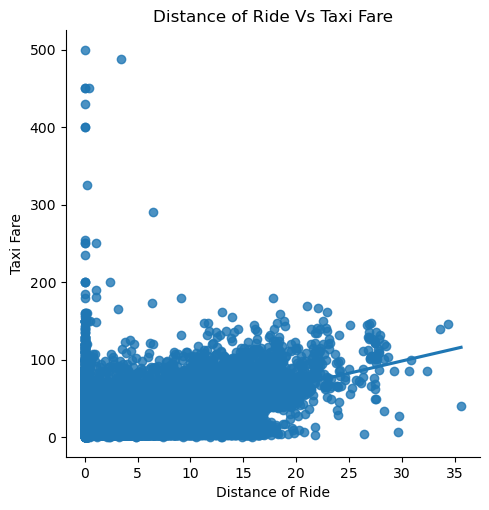

In [5]:
# Scatter Plot Between Eucledian Distance and Fare Amount

sns.lmplot(x='euc_distance', y='fare_amount', data=train)

plt.title('Distance of Ride Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Distance of Ride')
# Set y-axis label
plt.ylabel('Taxi Fare')

* Although, as we can see in the attached plot there does exist a nearly linear relationship between the two for a lot of data samples. This is more clear in the range of distance travelled 5 to 50.

* One interesting aspect I think could be a depiction of the above plot is that the line describing the data is quite below the y=x line, i.e the fare for higher distances does not increase in proportion to how it does for the distances clustered around the centre.

* Ee can see a cluster of data samples at very high distances (60-80) but with quite less fare. This could be due to the Trips to the Airport which are quite long, but have fixed prices.

### Plot depicting relationship between 'Time of day' and 'Distance Travelled'.

Text(33.51562500000001, 0.5, 'Distance of Ride')

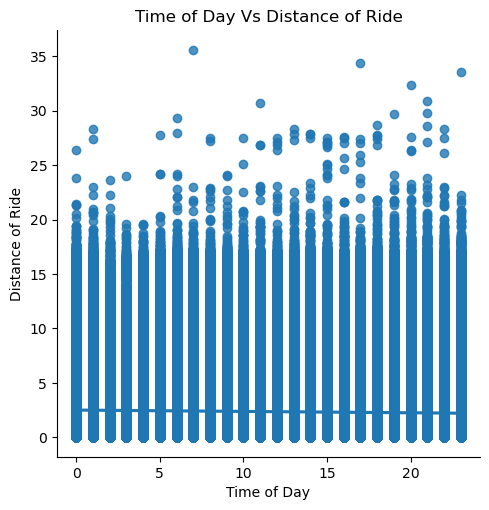

In [7]:
# Scatter Plot Between Eucledian Distance and Time of the Day

sns.lmplot(x='pickup_hour', y='euc_distance', data=train)

plt.title('Time of Day Vs Distance of Ride')
# Set x-axis label
plt.xlabel('Time of Day')
# Set y-axis label
plt.ylabel('Distance of Ride')

* We see that Time of the Day and Distance travelled are not quite linearly related.

* The average distance travelled may be high at the centre (i.e through the day than early or late night) but apart from this, there seems to be no definite linear relationship between time and the distance travelled.

### Plot depicting relationship between 'Time of day' and 'Taxi Fare'.

Text(24.640625000000007, 0.5, 'Taxi Fare')

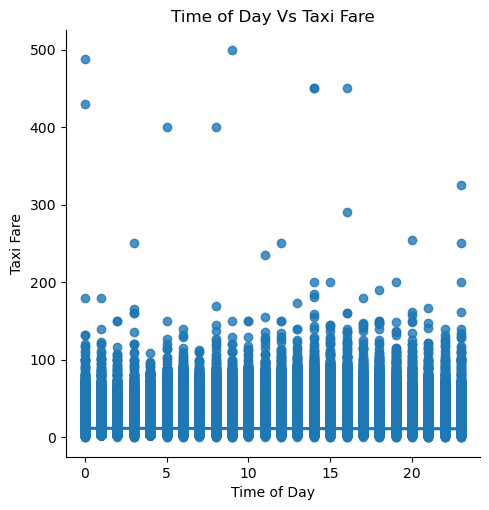

In [8]:
# Scatter Plot Between Fare Amount and Time of the Day

sns.lmplot(x='pickup_hour', y='fare_amount', data=train)

plt.title('Time of Day Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Time of Day')
# Set y-axis label
plt.ylabel('Taxi Fare')

* We see that there does not exist that strong a linear relationship between Time of the Day and Taxi Fare either.

* The interesting aspect about this plot are the data points that lie at high Taxi Fares in the middle of the day, and some at the end of the day. With an assumption that most travel to the airport happens either at early or late hours and with the fact that the fare for these trips is fixed, these anomalous data points would not be of the trips to the airport.

* Instead I feel that the reason for the high fare during midday and later could be due to the increased traffic during that time that could have lead to less available cabs with surged prices, thus leading to some really high data points.

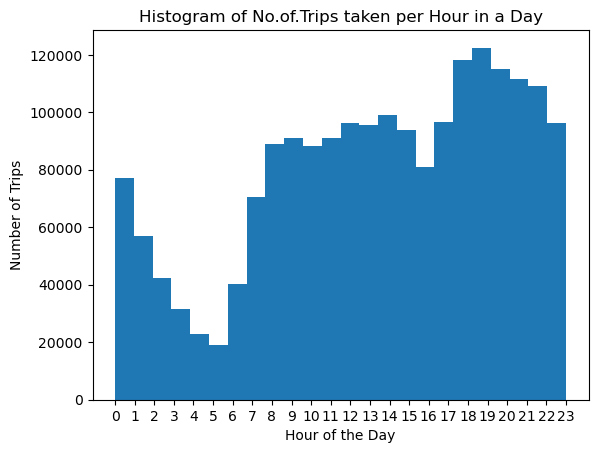

In [9]:
# Histogram of No.of.Trips taken per Hour in a Day

plt.hist(train.pickup_hour, bins=24)
plt.xticks(np.arange(0,24,step=1))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Histogram of No.of.Trips taken per Hour in a Day')
plt.show()

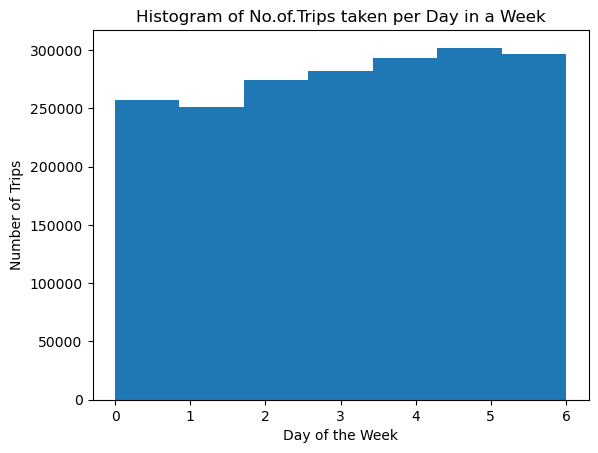

In [10]:
# Histogram of No.of.Trips taken per Day in a Week

def encodeDays(day_of_week):
    day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    return day_dict[day_of_week]
train['pickup_day_of_week']=train['pickup_day_of_week'].apply(lambda x:encodeDays(x))

plt.hist(train.pickup_day_of_week, bins=7)
plt.xticks(np.arange(0,7,step=1))
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Histogram of No.of.Trips taken per Day in a Week')
plt.show()

### PLOTS BETWEEN FARE AMOUNT AND WEATHER CONDITIONS

* The below plots indicate the New parameters that we have used from an External New York Weather Dataset.

* The parameters are ['avg_wind', 'max_temp', 'min_temp', 'precipitation', 'snow_depth', 'snowfall']. We plotted all these variables against the Fare amount to see how they were related to the two and also to check whether these features would help improve my existing model or not and I found some interesting observations.

Text(24.640625000000007, 0.5, 'Taxi Fare')

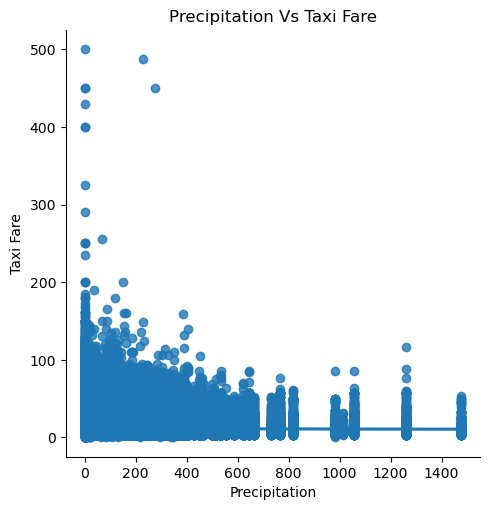

In [11]:
sns.lmplot(x='precipitation', y='fare_amount', data=train)

plt.title('Precipitation Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Precipitation')
# Set y-axis label
plt.ylabel('Taxi Fare')

Text(24.640625000000007, 0.5, 'Taxi Fare')

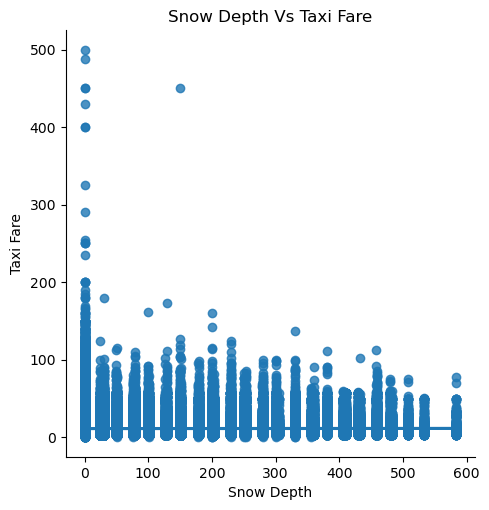

In [12]:
sns.lmplot(x='snow_depth', y='fare_amount', data=train)

plt.title('Snow Depth Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Snow Depth')
# Set y-axis label
plt.ylabel('Taxi Fare')

Text(24.640625000000007, 0.5, 'Taxi Fare')

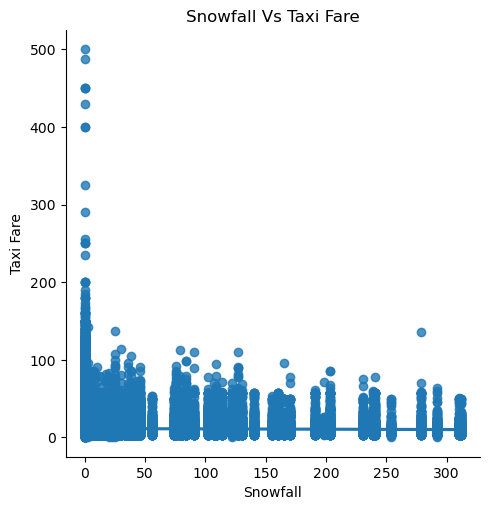

In [13]:
sns.lmplot(x='snowfall', y='fare_amount',data=train)

plt.title('Snowfall Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Snowfall')
# Set y-axis label
plt.ylabel('Taxi Fare')

Text(24.640625000000007, 0.5, 'Taxi Fare')

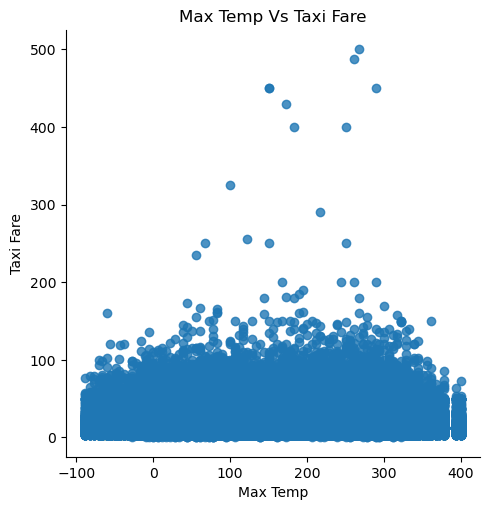

In [14]:
sns.lmplot(x='max_temp', y='fare_amount',data=train)

plt.title('Max Temp Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Max Temp')
# Set y-axis label
plt.ylabel('Taxi Fare')

Text(24.640625000000007, 0.5, 'Taxi Fare')

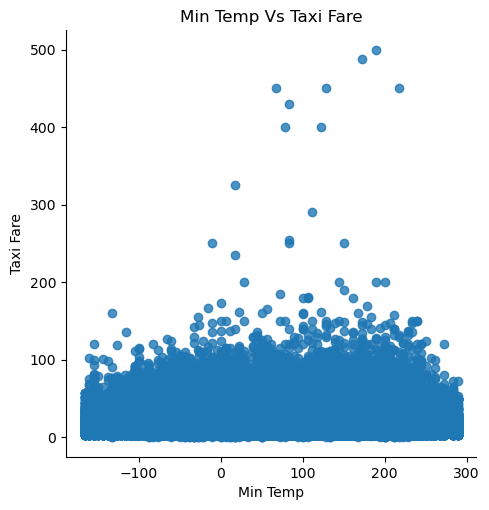

In [15]:
sns.lmplot(x='min_temp', y='fare_amount',data=train)

plt.title('Min Temp Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Min Temp')
# Set y-axis label
plt.ylabel('Taxi Fare')

Text(24.640625000000007, 0.5, 'Taxi Fare')

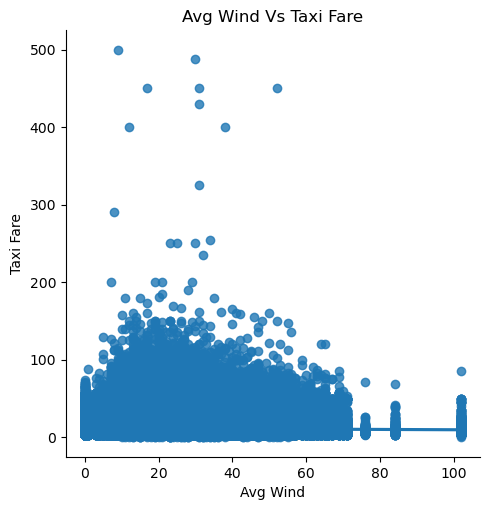

In [16]:
sns.lmplot(x='avg_wind', y='fare_amount', data=train)

plt.title('Avg Wind Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Avg Wind')
# Set y-axis label
plt.ylabel('Taxi Fare')

* Avg Wind - We can clearly see that for higher winds the taxi fare is lesser.

* Precipitation - Similar to Avg Wind, the fare is low when Precipitation is high.

* Snow Depth and Snow Fall - Here surprisingly I initially expected a decrease in both the rides and the fare as I thought the availability of cabs would become lesser. But I see that there is quite a constant curve which could mean that during the snow, people continue to use the cabs all the more due to the harsh weathers.

* Min Temp and Max Temp - This plot was very interesting indicating perfectly that the taxi fares are high when the temperatures are relatively bearable and they reduced when they go under a certain temperature.

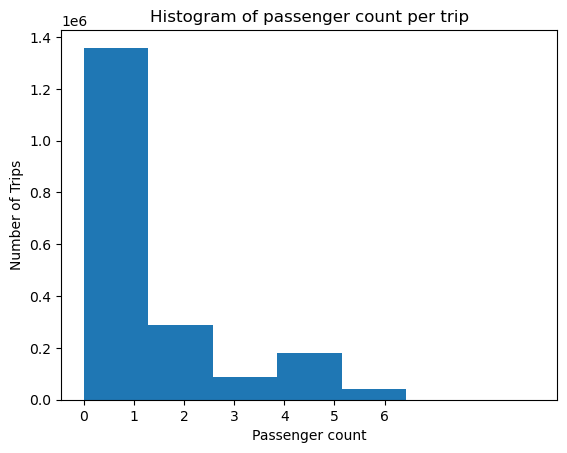

In [17]:
# Histogram of No.of.passengers per trip

plt.hist(train.passenger_count, bins=7)
plt.xticks(np.arange(0,7,step=1))
plt.xlabel('Passenger count')
plt.ylabel('Number of Trips')
plt.title('Histogram of passenger count per trip')
plt.show()

Text(0.5, 1.0, 'Fare amount vs No. of passengers')

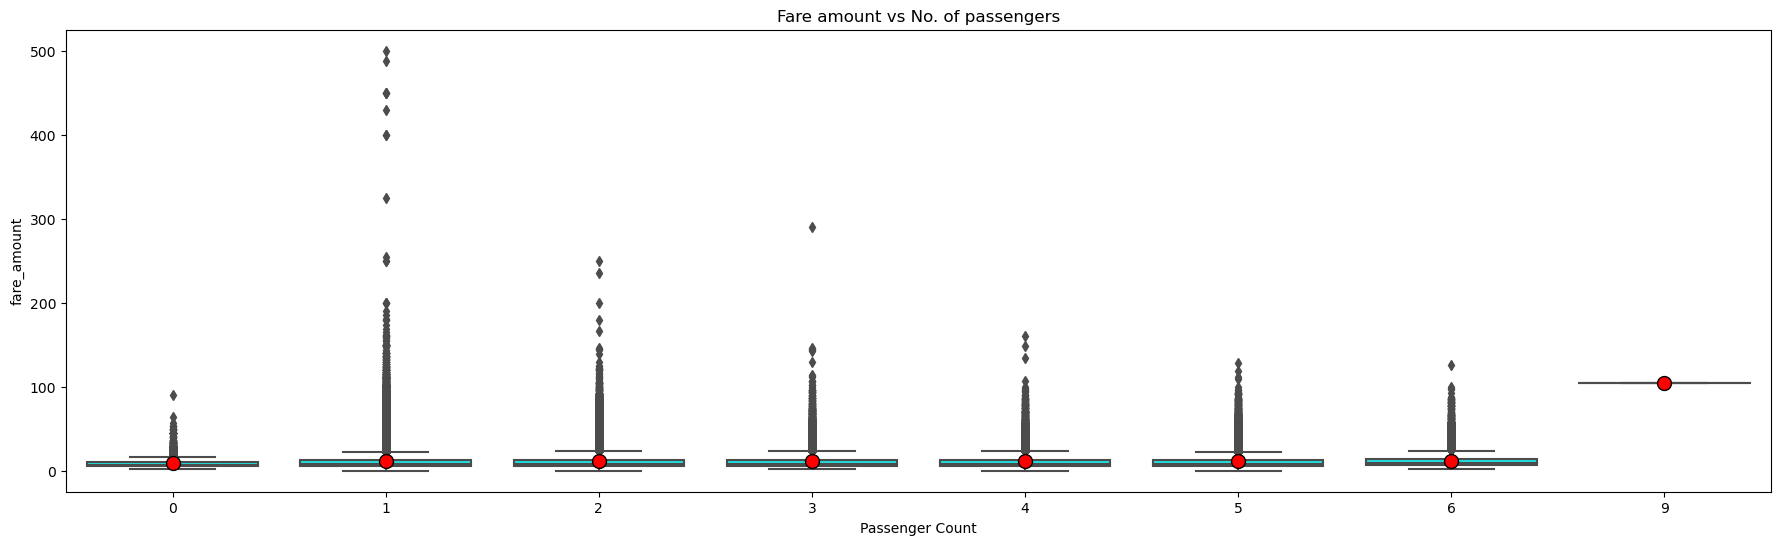

In [20]:
plt.figure(figsize=(22, 6))
sns.boxplot(x = train['passenger_count'],y = train['fare_amount'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title ("Fare amount vs No. of passengers")

Box plot shows no significant vatiation means of between passenger counts.

### Correlation matrix

Correlation heatmap to check the correlations amongst all features.

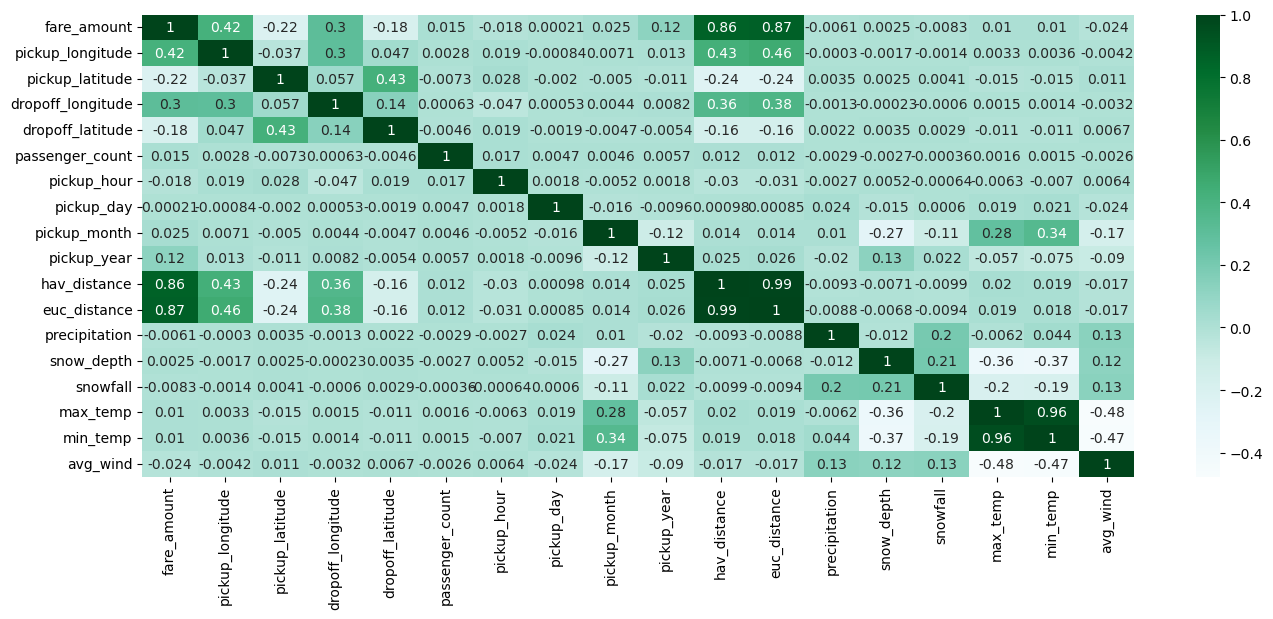

In [24]:
plt.figure(figsize = (16,6))
sns.heatmap(train.drop(['key', 'pickup_datetime','pickup_day_of_week'], axis = 1).corr(), cmap ='BuGn', annot = True);

From the correlation heatmap it is clear that the distance, lattitude and longitude features have higher correlation with the target as compared to the other features.